In [1]:
# importing necessaery libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
housing = pd.read_csv(r"C:\Users\MyAccount\Documents\Downloads\housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853


In [23]:
dummies = pd.get_dummies(housing["ocean_proximity"])
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [24]:
housing = pd.concat([housing,dummies], axis = 'columns')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,0,0,0,1,0


In [25]:
housing = housing.drop(["total_bedrooms", "population", "households","INLAND"], axis = 1)

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,0,0,1,0
1,-122.22,37.86,21.0,7099.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,0,0,1,0
2,-122.24,37.85,52.0,1467.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,0,0,1,0
3,-122.25,37.85,52.0,1274.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,0,0,1,0
4,-122.25,37.85,52.0,1627.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,0,0,1,0


In [27]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,bedrooms_per_room,rooms_per_household,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,3.870671,206855.816909,0.213039,5.429000,0.442636,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,1.899822,115395.615874,0.057983,2.474173,0.496710,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,0.499900,14999.000000,0.100000,0.846154,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,2.563400,119600.000000,0.175427,4.440716,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,3.534800,179700.000000,0.203162,5.229129,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,4.743250,264725.000000,0.239821,6.052381,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,15.000100,500001.000000,1.000000,141.909091,1.000000,1.000000,1.000000,1.000000


In [28]:
housing["bedrooms_per_room"].isna().sum()

207

In [29]:
median = housing["bedrooms_per_room"].median()
median

0.20316243411595591

In [30]:
new_housing = housing.fillna(median)
new_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,bedrooms_per_room,rooms_per_household,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,3.870671,206855.816909,0.212940,5.429000,0.442636,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,1.899822,115395.615874,0.057700,2.474173,0.496710,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,0.499900,14999.000000,0.100000,0.846154,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,2.563400,119600.000000,0.175708,4.440716,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,3.534800,179700.000000,0.203162,5.229129,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,4.743250,264725.000000,0.239273,6.052381,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,15.000100,500001.000000,1.000000,141.909091,1.000000,1.000000,1.000000,1.000000


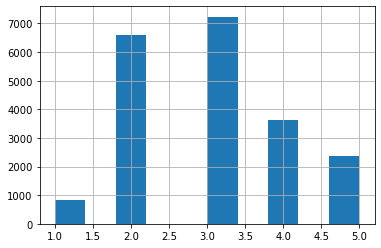

In [34]:
new_housing["income_cat"] = pd.cut(housing["median_income"], bins = [0,1.5,3,4.5,6,np.inf], labels = [1,2,3,4,5])
new_housing["income_cat"].hist()

In [37]:
new_housing.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-122.23,37.88,41.0,880.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,0,0,1,0,5
1,-122.22,37.86,21.0,7099.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,0,0,1,0,5
2,-122.24,37.85,52.0,1467.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,0,0,1,0,5
3,-122.25,37.85,52.0,1274.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,0,0,1,0,4
4,-122.25,37.85,52.0,1627.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,0,0,1,0,3


In [2]:
#training data

In [38]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(new_housing, test_size =0.2, random_state = 42)

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(new_housing, new_housing["income_cat"]):
    strat_train_set = new_housing.loc[train_index]
    strat_test_set = new_housing.loc[test_index]

In [44]:
new_train_set = strat_train_set.drop(["income_cat","median_house_value","total_rooms", "rooms_per_household","ocean_proximity"],axis=1)
train_label = strat_train_set["median_house_value"]
print(new_train_set)
print(train_label)

       longitude  latitude  housing_median_age  median_income  \
17606    -121.89     37.29                38.0         2.7042   
18632    -121.93     37.05                14.0         6.4214   
14650    -117.20     32.77                31.0         2.8621   
3230     -119.61     36.31                25.0         1.8839   
3555     -118.59     34.23                17.0         3.0347   
...          ...       ...                 ...            ...   
6563     -118.13     34.20                46.0         4.9312   
12053    -117.56     33.88                40.0         2.0682   
13908    -116.40     34.09                 9.0         3.2723   
11159    -118.01     33.82                31.0         4.0625   
15775    -122.45     37.77                52.0         3.5750   

       bedrooms_per_room  <1H OCEAN  ISLAND  NEAR BAY  NEAR OCEAN  
17606           0.223852          1       0         0           0  
18632           0.159057          1       0         0           0  
14650          

In [45]:
new_test_set = strat_test_set.drop(["income_cat","median_house_value","total_rooms","rooms_per_household","ocean_proximity"],axis=1)
test_label = strat_test_set["median_house_value"]
print(new_test_set.head())
print(test_label.head())

       longitude  latitude  housing_median_age  median_income  \
5241     -118.39     34.12                29.0         8.2816   
10970    -117.86     33.77                39.0         4.6111   
20351    -119.05     34.21                27.0         3.0119   
6568     -118.15     34.20                52.0         4.1518   
13285    -117.68     34.07                32.0         4.0375   

       bedrooms_per_room  <1H OCEAN  ISLAND  NEAR BAY  NEAR OCEAN  
5241            0.156972          1       0         0           0  
10970           0.157490          1       0         0           0  
20351           0.212532          1       0         0           0  
6568            0.171333          0       0         0           0  
13285           0.176901          0       0         0           0  
5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
Name: median_house_value, dtype: float64


In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(new_train_set, train_label)

LinearRegression()

In [47]:
lin_reg.score(new_train_set, train_label)

0.6177162574866875

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(new_train_set, train_label)

DecisionTreeRegressor()

In [49]:
tree_reg.score(new_train_set, train_label)

1.0

In [50]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(new_train_set, train_label)
forest_reg.score(new_train_set, train_label)

0.9736404260132628

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, new_train_set, train_label, cv = 5)
scores

array([0.81192827, 0.79654045, 0.80021086, 0.81568602, 0.80317787])

In [52]:
scores.mean()

0.80550869401767

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, new_train_set, train_label, cv = 5)
scores.mean()


0.6354802191374878

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, new_train_set, train_label, cv = 5)
scores.mean()

0.616944550706723

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[30,35,40], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'n_estimators':[10, 15], 'max_features':[4,6,8]},
             ]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5)
grid_search.fit(new_train_set, train_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [30, 35, 40]},
                         {'bootstrap': [False], 'max_features': [4, 6, 8],
                          'n_estimators': [10, 15]}])

In [56]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=40)

In [57]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)


0.8101499027866621 {'max_features': 2, 'n_estimators': 30}
0.811897046928723 {'max_features': 2, 'n_estimators': 35}
0.8154265556837016 {'max_features': 2, 'n_estimators': 40}
0.8130253803680046 {'max_features': 4, 'n_estimators': 30}
0.8117387697521613 {'max_features': 4, 'n_estimators': 35}
0.8140471781883072 {'max_features': 4, 'n_estimators': 40}
0.8087858673892819 {'max_features': 6, 'n_estimators': 30}
0.8111011612057784 {'max_features': 6, 'n_estimators': 35}
0.8111807363696917 {'max_features': 6, 'n_estimators': 40}
0.8042451647291198 {'max_features': 8, 'n_estimators': 30}
0.8051122365979945 {'max_features': 8, 'n_estimators': 35}
0.8052140750770629 {'max_features': 8, 'n_estimators': 40}
0.7981812490698401 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
0.8086842065002473 {'bootstrap': False, 'max_features': 4, 'n_estimators': 15}
0.7941803804512138 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
0.7976888565270746 {'bootstrap': False, 'max_features': 

In [58]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.68921818e-01, 1.50695633e-01, 7.07439669e-02, 3.27788461e-01,
       1.81900718e-01, 4.63429809e-02, 3.25148898e-04, 2.01938459e-02,
       3.30874282e-02])

In [59]:
final_model = grid_search.best_estimator_
X_test = new_test_set
y_test = test_label
final_model.fit(X_test, y_test)
final_model.score(X_test,y_test)

0.9687537395619572

In [61]:
final_model.predict([[-118.15, 34.20, 52.0, 4.1518, 0.171333, 0, 0, 0, 0]])

array([185067.45])

In [62]:
new_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'bedrooms_per_room', '<1H OCEAN', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [72]:
import pickle
with open('my_model_pickle','wb') as f:
    pickle.dump(final_model,f)

In [73]:
with open('my_model_pickle','rb') as f:
    model = pickle.load(f)

In [74]:
model.predict([[-118.15, 34.20, 52.0, 4.1518, 0.171333, 0, 0, 0, 0]])

array([185067.45])